# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("C:\\Users\\Harsh\\Downloads\\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [69]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [70]:
mapp ={
    "Internet" : 1,
    "Mobile" : 0
}

In [71]:
df['sales_channel']= df['sales_channel'].map(mapp)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [72]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,1,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,1,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,1,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [74]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [75]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [76]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [94]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [96]:
mp={
    "RoundTrip":1,
    "CircleTrip":2,
    "OneWay":3,
}
df['trip_type'] = df['trip_type'].map(mp)

In [97]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [98]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [105]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [79]:
country = df.groupby('booking_origin')['booking_complete'].value_counts().unstack(fill_value=0)

In [80]:
country

booking_complete,0,1
booking_origin,,
(not set),70,14
Afghanistan,1,0
Algeria,1,0
Argentina,6,0
Australia,16972,900
...,...,...
United Arab Emirates,39,3
United Kingdom,152,21
United States,372,84


In [81]:
tr = country[(country[0] > 0) & (country[1] > 0)]

In [82]:
# tr = tr.drop('(not set)', inplace=True)

In [83]:
tr = tr.rename(index= {'(not set)': 'NA'})

In [84]:
# tr = tr.drop('NA', inplace=True)

In [85]:
tr

booking_complete,0,1
booking_origin,,
NA,70,14
Australia,16972,900
Bahrain,2,3
Bangladesh,34,2
Belgium,6,1
Brunei,126,41
Cambodia,96,36
Canada,55,2
Chile,16,1


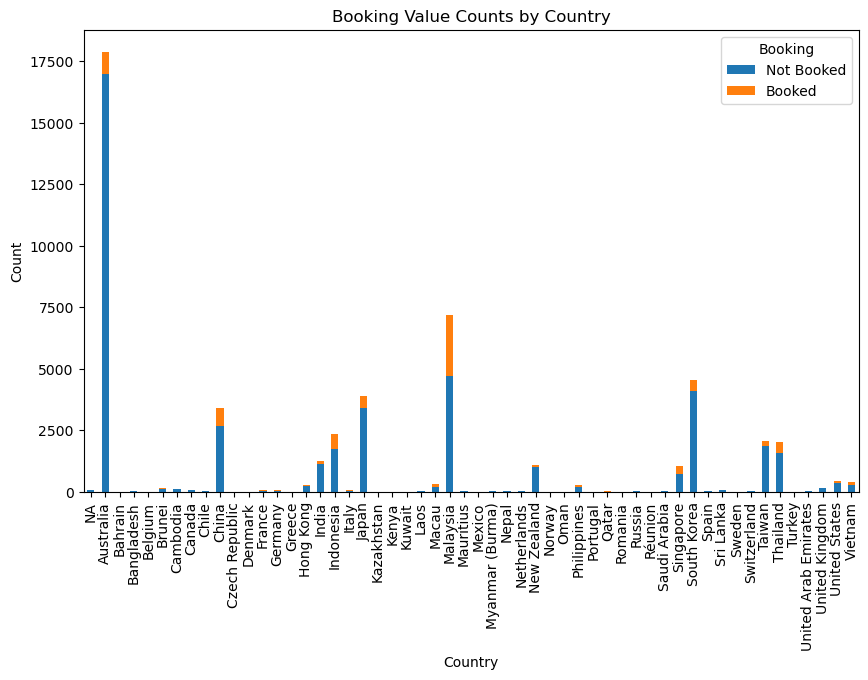

In [86]:
tr.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Booking Value Counts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Booking', labels=['Not Booked', 'Booked'])
plt.show()

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [114]:
col = ['route', 'booking_origin']
df1 = df.drop(columns=col, axis = 1)

In [115]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,0,0,5.52,0
2,2,1,1,243,22,17,3,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,0,1,5.52,0
4,2,1,1,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,1,0,1,5.62,0


In [116]:
x = df1.iloc[:,:-1]
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,1,1,262,19,7,6,1,0,0,5.52
1,1,1,1,112,20,3,6,0,0,0,5.52
2,2,1,1,243,22,17,3,1,1,0,5.52
3,1,1,1,96,31,4,6,0,0,1,5.52
4,2,1,1,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62
49996,1,1,1,111,6,4,7,0,0,0,5.62
49997,1,1,1,24,6,22,6,0,0,1,5.62
49998,1,1,1,15,6,11,1,1,0,1,5.62


In [117]:
y = df1.iloc[:,-1]

In [118]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [120]:
rf = RandomForestClassifier(n_estimators=100, random_state=101)

In [121]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=101)

In [122]:
y_pred = rf.predict(x_test)

In [123]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [124]:
accuracy_score(y_test,y_pred)

0.8521

In [125]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      8532\n           1       0.47      0.06      0.11      1468\n\n    accuracy                           0.85     10000\n   macro avg       0.67      0.53      0.51     10000\nweighted avg       0.80      0.85      0.80     10000\n'

In [131]:
con_mat

array([[8429,  103],
       [1376,   92]], dtype=int64)

<Axes: >

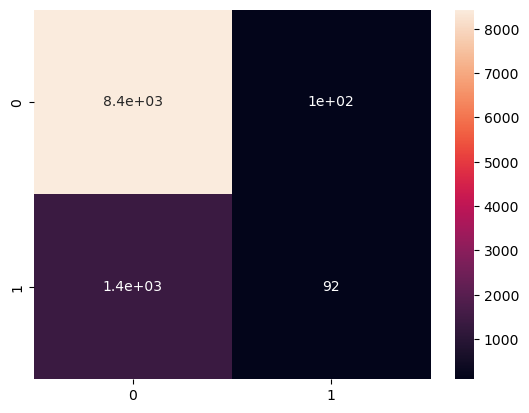

In [129]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat
sns.heatmap(con_mat, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample DataFrame
data = {'country': ['USA', 'USA', 'Canada', 'Canada', 'Canada', 'USA', 'USA', 'Canada'],
        'booking': ['Hotel', 'Flight', 'Hotel', 'Flight', 'Car Rental', 'Flight', 'Car Rental', 'Hotel']}

df = pd.DataFrame(data)

# Convert 'booking' column to binary values (1 for booked, 0 for not booked)
df['booking_binary'] = df['booking'].apply(lambda x: 1 if x != 'Car Rental' else 0)

# Encoding categorical feature 'country'
df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Separate features and target variable
X = df.drop(['booking', 'booking_binary'], axis=1)
y = df['booking_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


In [130]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)


                       importance
purchase_lead            0.290133
flight_hour              0.191713
length_of_stay           0.163763
flight_duration          0.117709
flight_day               0.114548
num_passengers           0.058106
wants_in_flight_meals    0.024288
wants_preferred_seat     0.014952
wants_extra_baggage      0.012798
sales_channel            0.009903
trip_type                0.002088
